In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
df = pd.read_csv('../input/cleaned-toxic-comments/train_preprocessed.csv')

In [10]:
categories = [x for x in df.columns]
categories.remove('id')
categories.remove('comment_text')
categories.remove('set')

In [11]:
df.head(20)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
5,congratulations from me as well use the tool...,00025465d4725e87,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
6,cock suck before you piss around on my work,0002bcb3da6cb337,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
7,your vandalism to the matt shirvington article...,00031b1e95af7921,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
8,sorry if the word nonsense was offensive to ...,00037261f536c51d,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
9,alignment on this subject and which are contra...,00040093b2687caa,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [12]:
def classify(row):
    for c in categories:
        if row[c]==1:
            return 1
    return 0    

In [13]:
df['class'] = df[categories].apply(classify,axis=1)

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comment_text'])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,df['class'],test_size=0.2,random_state=42)

In [16]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [17]:
model.score(x_test,y_test)

0.9618047939840201

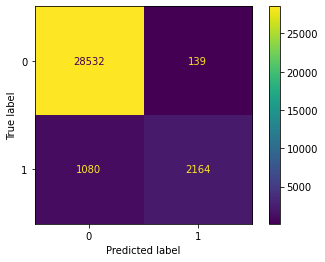

In [18]:
plot_confusion_matrix(model,x_test,y_test)